In [1]:
import ROOT
import healpy as hp
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.legend import Legend
import array
from math import sqrt, fabs, sin, exp, log10
from ROOT import TFile, TTree, TChain, TBranch, TH1D, TH1I, TH1F, TH2F, Math
from ROOT import TLorentzVector, TVector2
from ROOT.Math import LorentzVector, VectorUtil

Welcome to JupyROOT 6.24/06


In [2]:
tfile = TFile.Open('ntuple_jet_tracks.root')
print(tfile)
tree = tfile.Get("qcdtree")
print(tree)

Name: ntuple_jet_tracks.root Title: 
Name: qcdtree Title: qcdtree


In [3]:
branches = tree.GetListOfBranches()
leaves = tree.GetListOfLeaves()

In [4]:
for lv in leaves:
    lvname = lv.GetName()
    print(lv)

Name: nGenParticles Title: nGenParticles
Name: genStatus Title: genStatus[nGenParticles]
Name: genPdgId Title: genPdgId[nGenParticles]
Name: genM Title: genM[nGenParticles]
Name: genPx Title: genPx[nGenParticles]
Name: genPy Title: genPy[nGenParticles]
Name: genPz Title: genPz[nGenParticles]
Name: nGenJets Title: nGenJets
Name: genJetM Title: genJetM[nGenJets]
Name: genJetPx Title: genJetPx[nGenJets]
Name: genJetPy Title: genJetPy[nGenJets]
Name: genJetPz Title: genJetPz[nGenJets]
Name: nGenJetParticles Title: nGenJetParticles[nGenJets]
Name: genJetParticleStatus Title: genJetParticleStatus
Name: genJetParticlePdgId Title: genJetParticlePdgId
Name: genJetParticleMvec Title: genJetParticleMvec
Name: genJetParticlePxvec Title: genJetParticlePxvec
Name: genJetParticlePyvec Title: genJetParticlePyvec
Name: genJetParticlePzvec Title: genJetParticlePzvec
Name: nPFJets Title: nPFJets
Name: pfJetM Title: pfJetM[nPFJets]
Name: pfJetPx Title: pfJetPx[nPFJets]
Name: pfJetPy Title: pfJetPy[nPFJets

In [5]:
nevt = 100
nentries = tree.GetEntries()
print("Number of events: ", nentries, "  Printout every: ", 1)

Number of events:  100   Printout every:  1


In [6]:
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ", iev)
    tree.GetEntry(iev)
    if iev%nevt==0:
        print("Genjets: ", tree.nGenJets)
    for ijet in range(tree.nGenJets):
        if iev%nevt==0:
            print(tree.nGenJetParticles[ijet], tree.genJetM[ijet], tree.genJetPx[ijet], tree.genJetPy[ijet], tree.genJetPz[ijet])
print("      JetM                 Px                     Py                Pz ")

Processing event:  0
Genjets:  16
30 117.85346899999999 -2746.268644095081 1374.9113236377466 582.7829075138067
106 247.714477 2639.169214223319 -1193.7040997525235 -2311.4354545895953
47 30.126704999999998 18.015197300397016 -188.81567480824353 375.0599530234526
35 28.915689 20.802414023293654 -105.86260389441041 -26.929356942980277
43 27.179 91.0548184341927 40.24929135271393 4.615777226647097
42 17.229568 0.3857992554730039 51.954187405682525 414.74522375032666
21 14.917508 -4.4631948541639765 41.48357114708137 -22.905779689371073
34 14.656744999999999 1.6100335388328084 -27.960150781290423 242.09569043148082
27 10.563125 -16.438051943344387 2.7803055208360083 56.845466350344786
28 9.715010999999999 5.957217689165054 14.862639594391386 -80.42753491314116
10 5.138631 -8.021145731900688 2.224940872264929 -9.22456934436065
14 5.731122 -5.4627608754548245 -5.506548796655239 -45.43756342441099
5 2.339076 6.491857447455152 -1.504645752291677 -16.63515451259035
13 2.2959739999999997 -6.458

In [7]:
tree.GetEntry(0)
ntracks = tree.nGenTracks
print("Number of tracks: ", ntracks)
print("          P                Pt")
for itrack in range(ntracks):
    print(itrack, tree.trackP[itrack], tree.trackPt[itrack])

Number of tracks:  226
          P                Pt
0 5.896086349117939 1.5421620578463935
1 6.184173357390134 2.080650788865182
2 7.989480348679459 3.5791278378562907
3 1.7867413367141254 0.5802580278963585
4 1.841152936156836 0.5043597481054978
5 15.056931891130272 2.000206938182425
6 4.203652056635199 0.6587344393260366
7 4.841330007860249 1.2912981087334094
8 4.508967868860565 1.5231175222157503
9 3.5109337697157414 1.2843505799316592
10 2.416464028315372 1.3077363403516193
11 2.2213706784914917 1.8115117641649403
12 1.5079689391144626 1.1866724879037671
13 3.4523049182800825 2.595944471940007
14 13.202587816761357 10.011662493124952
15 4.261250381770314 3.3176759785921144
16 13.069528662362773 10.19595966625747
17 13.027447609622246 10.141478955465162
18 22.42502643241976 17.65224875697599
19 84.1425846460878 64.84378810167463
20 8.965374147435167 6.921842519617128
21 7.192136307072024 6.030634627725296
22 3.0492375090154344 2.372676543076518
23 2.6394105366998377 2.1709136919897

In [8]:
print("          Eta                Phi")
for itrack in range(ntracks):
    print(itrack, tree.trackEta[itrack], tree.trackPhi[itrack])

          Eta                Phi
0 -2.0166913796404224 1.6969224179715086
1 -1.7528776103419048 1.3301253341647907
2 1.4417205586661843 2.861386301788325
3 1.7903476648653702 -2.7600665137562457
4 1.9686931918732624 3.1335828943551354
5 -2.7072937155145986 1.3892700602744745
6 -2.540339213270551 -2.1419096108411027
7 -1.9964091025578827 1.8929457715173565
8 -1.7486250887150607 -1.603707194055859
9 -1.6635051266034997 -0.2304716206239562
10 -1.2242667512789116 -0.13986088552958342
11 -0.6606070157788482 -1.5468957423467122
12 -0.7202058429010819 -1.2948085275472971
13 -0.7914426185335804 -0.4342757645222215
14 -0.7785843420622932 -0.4766623827857846
15 -0.7373797187367522 -0.42462794930238507
16 -0.7341779820846707 -0.4525455543380202
17 -0.7375813412764771 -0.42734834483994427
18 -0.7197258414641432 -0.44859163971627464
19 -0.7535610610778782 -0.43448399984214164
20 -0.750663808617751 -0.3972990971769495
21 -0.6110922920170634 -0.15437976448834964
22 -0.7382952410820285 -0.142947503484

In [9]:
print("         Pt                  Eta                 Phi                 E")
tracketaphi_ls = []
for itrack in range(ntracks):
    pt = tree.trackPt[itrack]
    eta = tree.trackEta[itrack]
    phi = tree.trackPhi[itrack]
    E = (tree.trackP[itrack])**2
    tracketaphi = LorentzVector('ROOT::Math::PtEtaPhiE4D<double>')(pt,eta,phi,E)
    tracketaphi_ls.append(tracketaphi)
    print(itrack, tracketaphi.pt(), tracketaphi.eta(), tracketaphi.phi(), tracketaphi.E())
    # tracketaphi are the eta, phi vectors of each track in genTracks

         Pt                  Eta                 Phi                 E
0 1.5421620578463935 -2.0166913796404224 1.6969224179715086 34.76383423625491
1 2.080650788865182 -1.7528776103419048 1.3301253341647907 38.24400011425396
2 3.5791278378562907 1.4417205586661843 2.861386301788325 63.83179624193525
3 0.5802580278963585 1.7903476648653702 -2.7600665137562457 3.1924446043229797
4 0.5043597481054978 1.9686931918732624 3.1335828943551354 3.389844134318938
5 2.000206938182425 -2.7072937155145986 1.3892700602744745 226.71119797413584
6 0.6587344393260366 -2.540339213270551 -2.1419096108411027 17.670690613253335
7 1.2912981087334094 -1.9964091025578827 1.8929457715173565 23.438476245008115
8 1.5231175222157503 -1.7486250887150607 -1.603707194055859 20.330791242416986
9 1.2843505799316592 -1.6635051266034997 -0.2304716206239562 12.326655935330386
10 1.3077363403516193 -1.2242667512789116 -0.13986088552958342 5.839298400142156
11 1.8115117641649403 -0.6606070157788482 -1.5468957423467122 4.93

In [10]:
print("         Pt                  Eta                 Phi                 E")
partetaphi_test = []
matches = []
nmatches = []
for ijet in range(1): #tree.nGenJets):
    for ipart in range(tree.nGenJetParticles[ijet]):
        pdgId = tree.genJetParticlePdgId[ipart]
        m = tree.genJetParticleMvec[ipart]
        px = tree.genJetParticlePxvec[ipart]
        py = tree.genJetParticlePyvec[ipart]
        pz = tree.genJetParticlePzvec[ipart]
        E = np.sqrt(m*m + px*px + py*py + pz*pz)
        p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)

        partetaphi = LorentzVector('ROOT::Math::PtEtaPhiE4D<double>')(p4part.pt(), p4part.eta(), p4part.phi() , p4part.E())
        if (abs(pdgId)==211 or abs(pdgId)==321 or abs(pdgId)==2212 or abs(pdgId)==11 or abs(pdgId)==13 or abs(pdgId)==15):
            partetaphi_test += (partetaphi,)
            print(ipart, partetaphi.pt(), partetaphi.eta(), partetaphi.phi(), partetaphi.E())
            for track in tracketaphi_ls:
                deltaR = VectorUtil.DeltaR(partetaphi, track)
                if deltaR<=0.001:
                    print("matched")
                    matches += [[tracketaphi_ls.index(track), deltaR]]
                    nmatches.append(tracketaphi_ls.index(track))

print("\n Out of", len(tracketaphi_ls), "tracks,", len(set(nmatches)), "have matches to charged gen jet particles. \n")
print("[Track index, deltaR]: \n")
print(matches)
        # partetaphi are the lorentz 4 vectors that contain eta and phi components for the particles in the gen jet

         Pt                  Eta                 Phi                 E
1 565.879150390625 0.1892489343881607 2.6766176223754883 576.0429738360546
matched
2 507.37225341796875 0.19008049368858335 2.675595998764038 516.5657332408126
matched
4 335.1861267089844 0.19064238667488081 2.6798324584960938 341.2957151292261
matched
6 58.17327499389648 0.19013431668281564 2.6828927993774414 59.22812376368594
7 53.19023513793946 0.18526598811149605 2.679368495941162 54.105866274564484
matched
8 40.34992980957031 0.18197257816791518 2.6662509441375732 41.020087012070356
matched
9 23.533327102661133 0.19633196294307698 2.694998264312744 23.98875254746879
matched
10 21.59543228149414 0.23315511643886558 2.6970748901367188 22.185513173492165
matched
14 6.141934871673585 0.2236952185630799 2.659881591796875 6.29779329411058
matched
16 1.8697991371154783 -0.46235927939415 2.7431366443634033 2.077936740001622
23 0.40721610188484186 0.4882633686065675 2.3175857067108154 0.4775776913140291
25 0.28370958566

In [11]:
allgenpart = False #True
event_test = []
for iev in range(nentries):
    jet_test = []
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets): 
        partetaphi_ls = []
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            status = tree.genJetParticleStatus[iptot+ipart]
            pdgId = tree.genJetParticlePdgId[iptot+ipart]
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            partetaphi = LorentzVector('ROOT::Math::PtEtaPhiE4D<double>')(p4part.pt(), p4part.eta(), p4part.phi(), p4part.E())
            # select particles
            if(not allgenpart):
                if (abs(pdgId)==211 or abs(pdgId)==321 or abs(pdgId)==2212 or abs(pdgId)==11 or abs(pdgId)==13 or abs(pdgId)==15):
                    for itrack in range(tree.nGenTracks):
                        pt = tree.trackPt[itrack]
                        eta = tree.trackEta[itrack]
                        phi = tree.trackPhi[itrack]
                        E = (tree.trackP[itrack])**2
                        tracketaphi = LorentzVector('ROOT::Math::PtEtaPhiE4D<double>')(pt,eta,phi,E)
                        deltaR = VectorUtil.DeltaR(partetaphi, tracketaphi)
                        if deltaR<=0.001:
                            print("Event",iev,"jet",ijet,"particle",ipart,"matched")
                            print(p4part.pt(), p4part.eta(), p4part.phi() , p4part.E())
                            partetaphi_ls.append(partetaphi)
            else:
                partetaphi_ls.append(partetaphi)
            p4jet += p4part 
        cmJet = p4jet.BoostToCM()
        print("cmJet Boost:",cmJet.x(),cmJet.y(),cmJet.z())
        p4jetcmjet = VectorUtil.boost(p4jet, cmJet)
        print("cmJet:",p4jetcmjet.mass(),p4jetcmjet.px(),p4jetcmjet.py(),p4jetcmjet.pz())
        jet_particle_test = []
        sump2cmjet = 0.0
        for partetaphi in partetaphi_ls:
            p4partetaphi = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(partetaphi.px(), partetaphi.py(), partetaphi.pz(), partetaphi.energy())
            p4partcmjet = VectorUtil.boost(p4partetaphi, cmJet)
            print("Boosted particle:", p4partcmjet.px(), p4partcmjet.py(), p4partcmjet.pz(), p4partcmjet.energy())
            jet_particle_test.append(p4partcmjet) # p4part p4partcmjet for lab or rest frame
            sump2cmjet+=p4partcmjet.px()*p4partcmjet.px()+p4partcmjet.py()*p4partcmjet.py()+p4partcmjet.pz()*p4partcmjet.pz()
        print("number of particles = ",len(jet_particle_test)," sump2cmjet = ",sump2cmjet)
        if (sump2cmjet>5.0*5.0):
            print("new jet sump2 = ",sump2cmjet)
            jet_test.append(jet_particle_test)
        iptot+=tree.nGenJetParticles[ijet]
    event_test.append(jet_test)

Processing event:  0
Genjets:  16
Event 0 jet 0 particle 1 matched
565.879150390625 0.1892489343881607 2.6766176223754883 576.0429738360546
Event 0 jet 0 particle 2 matched
507.37225341796875 0.19008049368858335 2.675595998764038 516.5657332408126
Event 0 jet 0 particle 4 matched
335.1861267089844 0.19064238667488081 2.6798324584960938 341.2957151292261
Event 0 jet 0 particle 7 matched
53.19023513793946 0.18526598811149605 2.679368495941162 54.105866274564484
Event 0 jet 0 particle 8 matched
40.34992980957031 0.18197257816791518 2.6662509441375732 41.020087012070356
Event 0 jet 0 particle 9 matched
23.533327102661133 0.19633196294307698 2.694998264312744 23.98875254746879
Event 0 jet 0 particle 10 matched
21.59543228149414 0.23315511643886558 2.6970748901367188 22.185513173492165
Event 0 jet 0 particle 14 matched
6.141934871673585 0.2236952185630799 2.659881591796875 6.29779329411058
cmJet Boost: 0.8778951513082769 -0.4395157602515105 -0.1862972608630638
cmJet: 117.85339656709338 -1.45

number of events =  100
number of jets =  3
number of particles =  8


0.0 180.0 -180.0 180.0


number of particles =  31


0.0 180.0 -180.0 180.0


number of particles =  8


0.0 180.0 -180.0 180.0


number of jets =  3
number of particles =  35


0.0 180.0 -180.0 180.0


number of particles =  17


0.0 180.0 -180.0 180.0


number of particles =  8


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  24


0.0 180.0 -180.0 180.0


number of particles =  50


0.0 180.0 -180.0 180.0


number of jets =  5
number of particles =  66


0.0 180.0 -180.0 180.0


number of particles =  12


0.0 180.0 -180.0 180.0


number of particles =  28


0.0 180.0 -180.0 180.0


number of particles =  13


0.0 180.0 -180.0 180.0


number of particles =  3


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  28


0.0 180.0 -180.0 180.0


number of particles =  22


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  15


0.0 180.0 -180.0 180.0


number of particles =  27


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  14


0.0 180.0 -180.0 180.0


number of particles =  22


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  26


0.0 180.0 -180.0 180.0


number of particles =  38


/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/healpy/visufunc.py:200: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = pylab.figure(fig, figsize=(8.5, 5.4))
0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  20


0.0 180.0 -180.0 180.0


number of particles =  10


0.0 180.0 -180.0 180.0


number of jets =  1
number of particles =  27
number of jets =  2
number of particles =  29
number of particles =  24
number of jets =  2
number of particles =  69
number of particles =  21
number of jets =  2
number of particles =  30
number of particles =  23
number of jets =  2
number of particles =  17
number of particles =  16
number of jets =  2
number of particles =  12
number of particles =  34
number of jets =  3
number of particles =  19
number of particles =  41
number of particles =  11
number of jets =  2
number of particles =  10
number of particles =  33
number of jets =  2
number of particles =  37
number of particles =  14
number of jets =  2
number of particles =  9
number of particles =  15
number of jets =  2
number of particles =  23
number of particles =  13
number of jets =  3
number of particles =  17
number of particles =  13
number of particles =  7
number of jets =  2
number of particles =  9
number of particles =  15
number of jets =  2
number of particles =

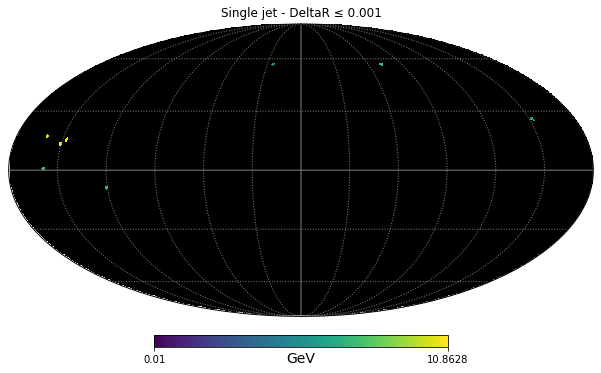

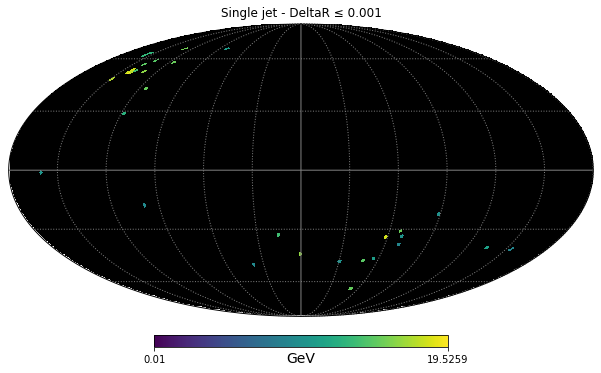

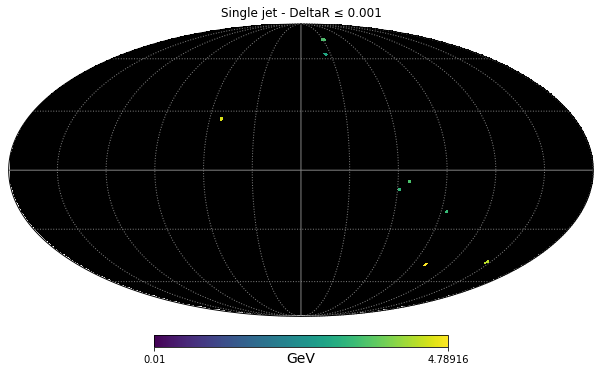

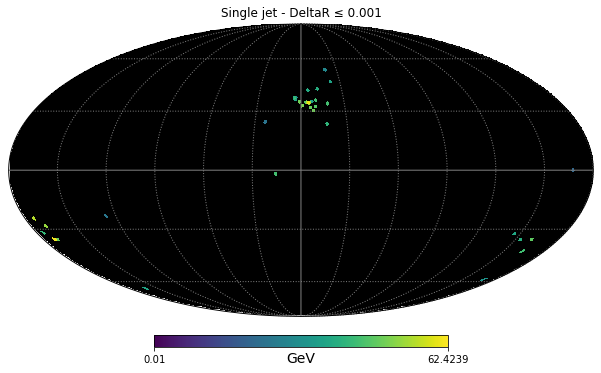

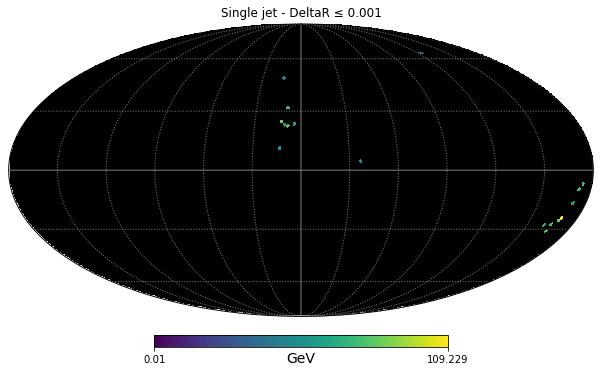

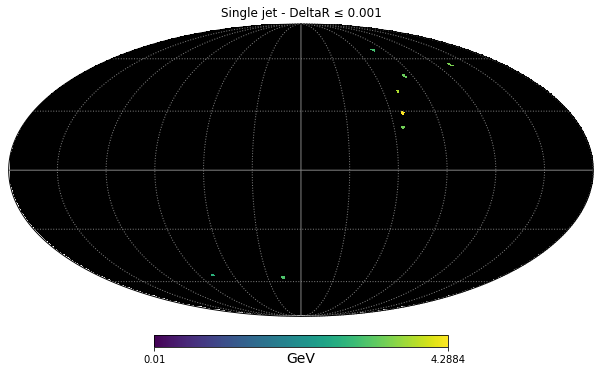

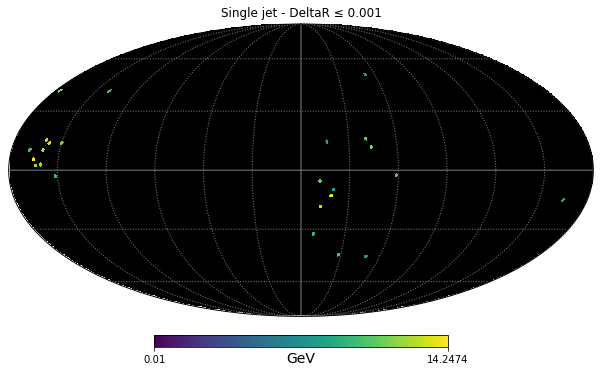

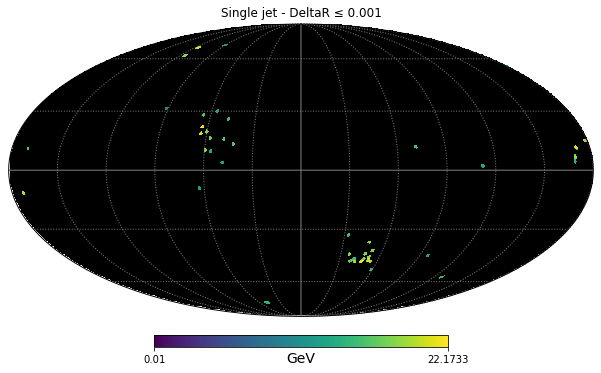

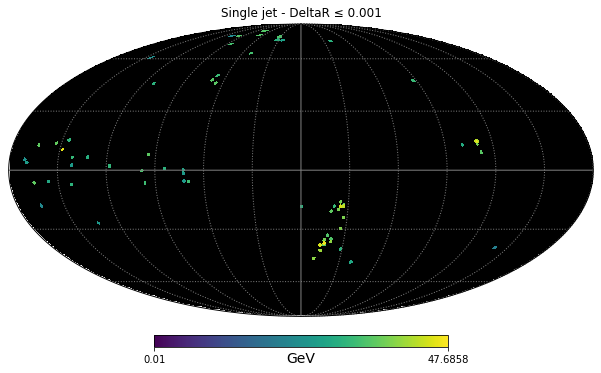

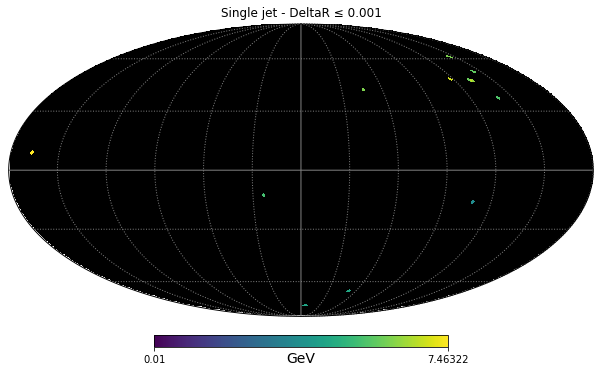

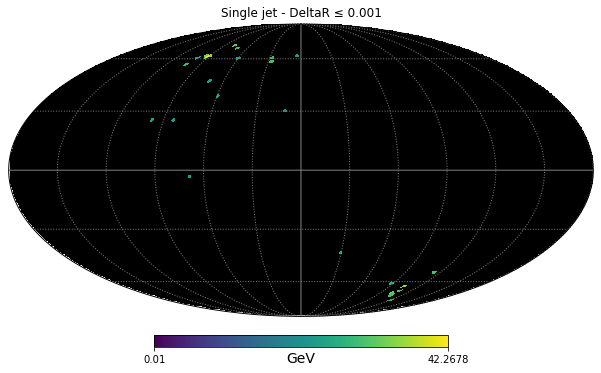

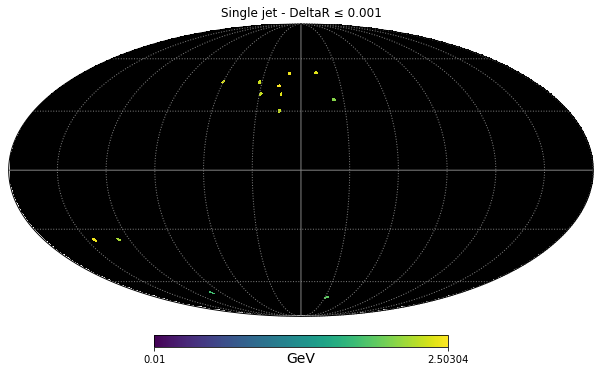

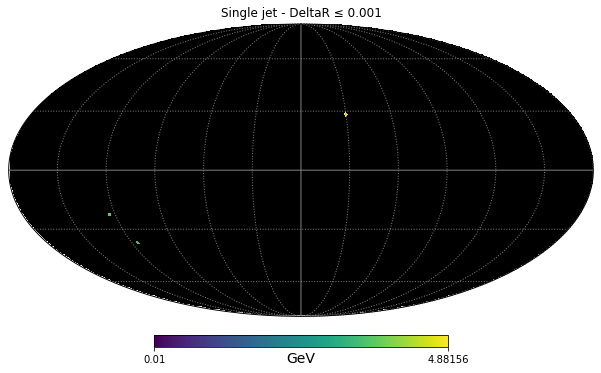

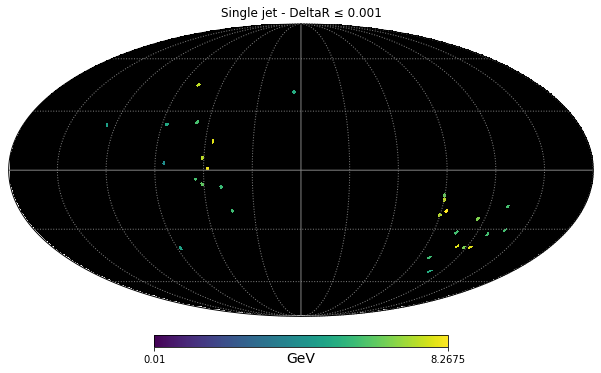

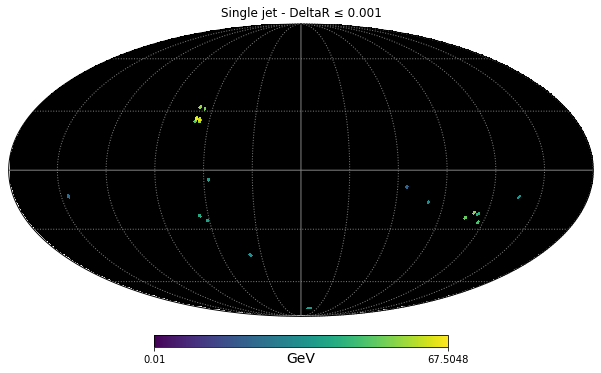

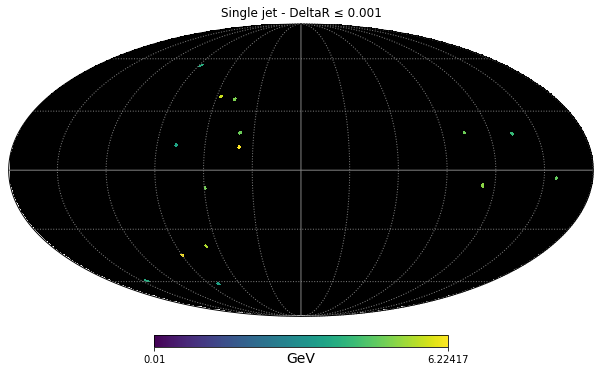

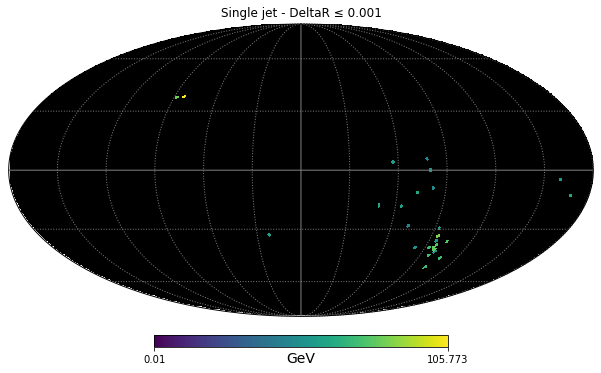

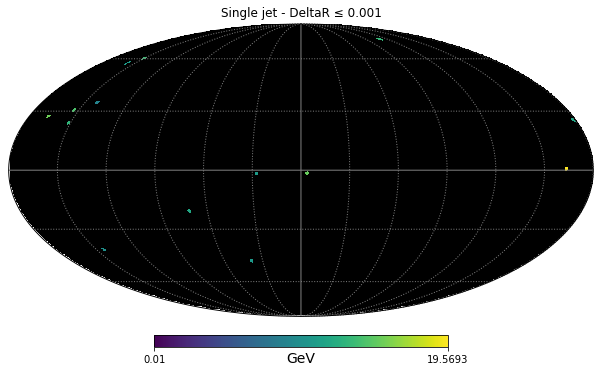

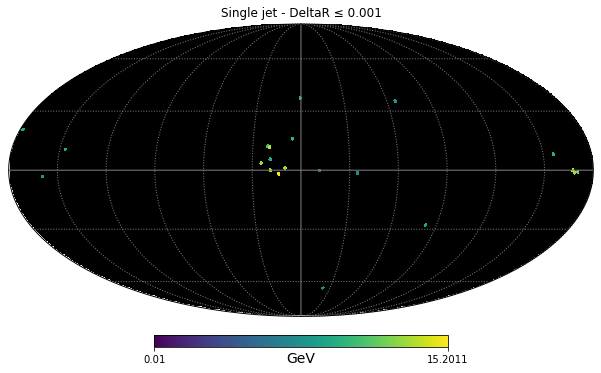

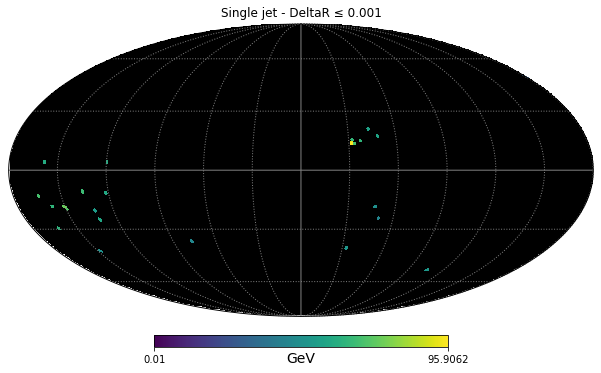

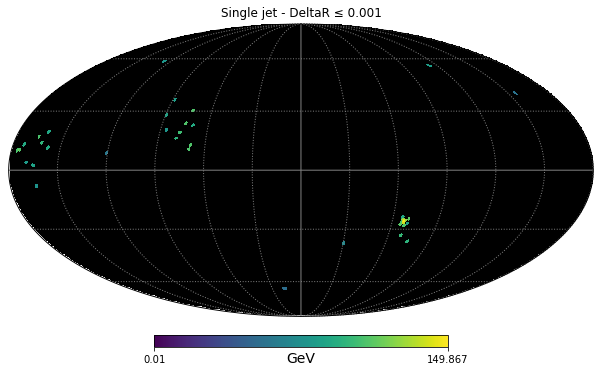

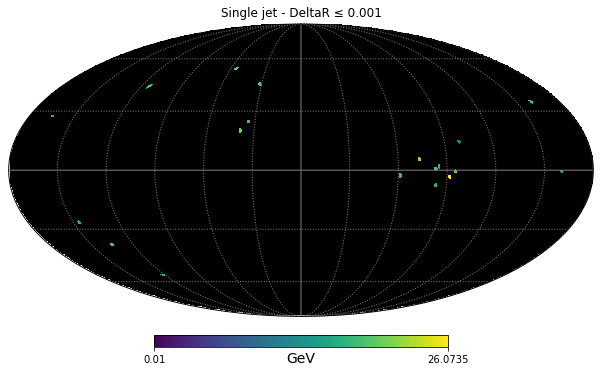

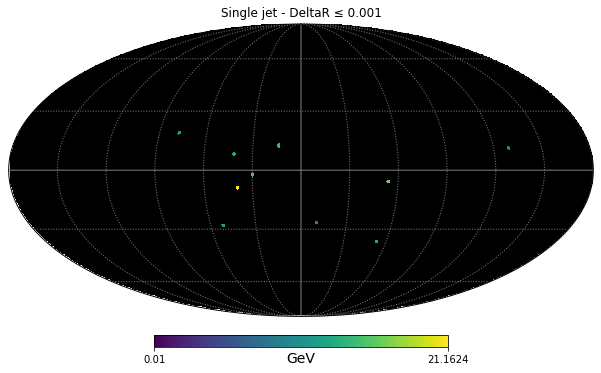

In [12]:
#Sky map of particles in jet that have matches to tracks
singlepixel = False

nside = 128*4

iev = 0
NPIX = hp.nside2npix(nside)
cls_list = []
print("number of events = ",len(event_test))
for jet_test in event_test:
    print("number of jets = ",len(jet_test))
    iev+=1
    ijet = 0
    for jet_particle_test in jet_test:
        print("number of particles = ",len(jet_particle_test))
        ijet+=1
        m = np.zeros(NPIX) # blank map
        for part in jet_particle_test:
            if(singlepixel):
                ipix_disc = hp.pixelfunc.ang2pix(nside=nside, theta=part.theta(), phi=part.phi())
            else: # choose radius
                vec = hp.ang2vec(part.theta(), part.phi())
                ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(1)) # all pixels within 1 degree of vector
            m[ipix_disc] += part.energy() # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
        if iev in range(1,10):
            hp.visufunc.mollview(m, title=r'Single jet - DeltaR ≤ 0.001', unit=r'GeV', min=0.01, norm='log', badcolor='black')
            hp.graticule(color='grey') # draw grid lines

number of events =  100
number of jets =  3
number of particles =  8
number of particles =  31
number of particles =  8
number of jets =  3
number of particles =  35
number of particles =  17
number of particles =  8
number of jets =  2
number of particles =  24
number of particles =  50
number of jets =  5
number of particles =  66
number of particles =  12
number of particles =  28
number of particles =  13
number of particles =  3
number of jets =  2
number of particles =  28
number of particles =  22
number of jets =  2
number of particles =  15
number of particles =  27
number of jets =  2
number of particles =  14
number of particles =  22
number of jets =  2
number of particles =  26
number of particles =  38
number of jets =  2
number of particles =  20
number of particles =  10
number of jets =  1
number of particles =  27
number of jets =  2
number of particles =  29
number of particles =  24
number of jets =  2
number of particles =  69
number of particles =  21
number of je

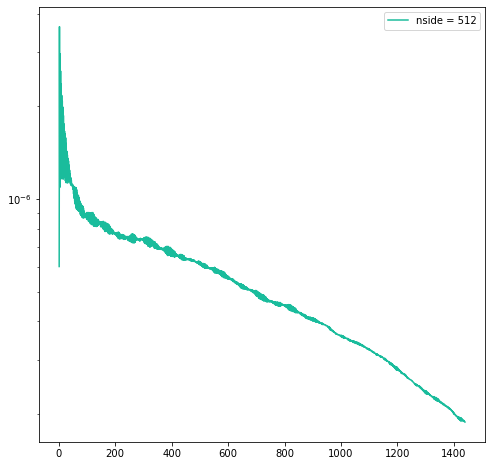

In [13]:
singlepixel = False
lmax = 360*4 #150
ls = np.array(range(1,lmax+1))

#Cl of particles in jet that have matches to tracks
nside = 128*4
iev = 0
NPIX = hp.nside2npix(nside)
cls_list = []
print("number of events = ",len(event_test))
for jet_test in event_test:
    print("number of jets = ",len(jet_test))
    iev+=1
    ijet = 0
    for jet_particle_test in jet_test:
        print("number of particles = ",len(jet_particle_test))
        ijet+=1
        m = np.zeros(NPIX) # blank map
        for part in jet_particle_test:
            if(singlepixel):
                ipix_disc = hp.pixelfunc.ang2pix(nside=nside, theta=part.theta(), phi=part.phi())
                energy = part.energy()
            else: # choose radius
                vec = hp.ang2vec(part.theta(), part.phi())
                ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(0.1)) # all pixels within 0.1 degree of vector
                energy = part.energy()/len(ipix_disc)
            m[ipix_disc] += energy # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
print("number of cls = ",len(cls_list))
plt.figure(figsize=(8,8))
icls = 0
for cls_test in cls_list:
    icls+=1
    if (icls == 1):
        cls_hp = cls_test
    else:
        cls_hp += cls_test 
plt.semilogy(ls,cls_hp[ls],label='nside = {}'.format(nside), color='#1ABC9C')
#plt.ylim((5e-8,None))
plt.legend()

0.0 180.0 -180.0 180.0


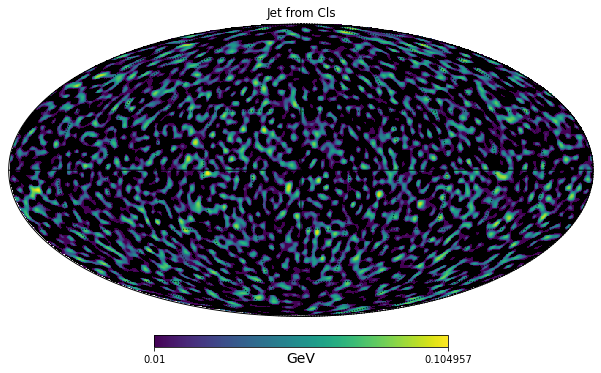

In [14]:
nside=128*4
lmax=360*4
mapredo = hp.sphtfunc.synfast(cls_hp, nside, lmax=80)
hp.visufunc.mollview(mapredo, title=r'Jet from Cls', unit=r'GeV', min=0.01, norm='log', badcolor='black')
hp.graticule()

In [15]:
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ", iev)
    tree.GetEntry(iev)
    if iev%nevt==0:
        print("PFjets: ", tree.nPFJets)
    for ijet in range(tree.nPFJets):
        if iev%nevt==0:
            print(tree.nPFJetParticles[ijet], tree.pfJetM[ijet], tree.pfJetPx[ijet], tree.pfJetPy[ijet], tree.pfJetPz[ijet])
print("      JetM                 Px                     Py                Pz ")

Processing event:  0
PFjets:  5
34 138.041442 -2776.5100970338303 1398.7969216669637 588.3779643410837
97 288.611297 2532.4265584394525 -1153.610114419595 -2218.277279089175
48 39.091274 21.734682187539914 -178.61362956118336 361.66621019325197
30 27.495417999999997 23.31629061084227 -101.1793882768494 -26.101017368378734
34 24.369837999999998 89.48646269568265 39.38605848000624 5.16105634928522
      JetM                 Px                     Py                Pz 


In [16]:
allpfpart = False #True
event_test = []
for iev in range(nentries):
    jet_test = []
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    print("PFjets: ",tree.nPFJets)
    iptot = 0
    for ijet in range(tree.nPFJets): 
        partetaphi_ls = []
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nPFJetParticles[ijet]):
            pdgId = tree.pfJetParticlePdgId[iptot+ipart]
            m = tree.pfJetParticleMvec[iptot+ipart]
            px = tree.pfJetParticlePxvec[iptot+ipart]
            py = tree.pfJetParticlePyvec[iptot+ipart]
            pz = tree.pfJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            partetaphi = LorentzVector('ROOT::Math::PtEtaPhiE4D<double>')(p4part.pt(), p4part.eta(), p4part.phi(), p4part.E())
            # select particles
            if(not allpfpart):
                if (abs(pdgId)==211 or abs(pdgId)==321 or abs(pdgId)==2212 or abs(pdgId)==11 or abs(pdgId)==13 or abs(pdgId)==15):
                    print("pf particle ", pdgId, p4part.pt(), p4part.eta(), p4part.phi() , p4part.E())
                    partetaphi_ls.append(partetaphi)
            else:
                partetaphi_ls.append(partetaphi)
            p4jet += p4part 
        cmJet = p4jet.BoostToCM()
        print("cmJet Boost:",cmJet.x(),cmJet.y(),cmJet.z())
        p4jetcmjet = VectorUtil.boost(p4jet, cmJet)
        print("cmJet:",p4jetcmjet.mass(),p4jetcmjet.px(),p4jetcmjet.py(),p4jetcmjet.pz())
        jet_particle_test = []
        sump2cmjet = 0.0
        for partetaphi in partetaphi_ls:
            p4partetaphi = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(partetaphi.px(), partetaphi.py(), partetaphi.pz(), partetaphi.energy())
            p4partcmjet = VectorUtil.boost(p4partetaphi, cmJet)
            print("Boosted particle:", p4partcmjet.px(), p4partcmjet.py(), p4partcmjet.pz(), p4partcmjet.energy())
            jet_particle_test.append(p4partcmjet) # p4part p4partcmjet for lab or rest frame
            sump2cmjet+=p4partcmjet.px()*p4partcmjet.px()+p4partcmjet.py()*p4partcmjet.py()+p4partcmjet.pz()*p4partcmjet.pz()
        print("number of particles = ",len(jet_particle_test)," sump2cmjet = ",sump2cmjet)
        if (sump2cmjet>5.0*5.0):
            print("new jet sump2 = ",sump2cmjet)
            jet_test.append(jet_particle_test)
        iptot+=tree.nPFJetParticles[ijet]
    event_test.append(jet_test)

Processing event:  0
PFjets:  5
pf particle  -211 703.9502563476562 0.1892096400260925 2.6767940521240234 716.5887184655098
pf particle  211 392.4927978515625 0.19070249795913685 2.675895929336548 399.651457607947
pf particle  -211 325.02392578125 0.19072414934635168 2.6797661781311035 330.95338308616647
pf particle  211 39.82904815673828 0.1818677484989166 2.6663198471069336 40.48979663992286
pf particle  -211 39.681976318359375 0.18529617786407457 2.6787455081939697 40.36540285366859
pf particle  211 22.675920486450195 0.1966864466667176 2.6952574253082275 23.116372979194928
pf particle  211 21.457672119140625 0.23323638737201685 2.6972453594207764 22.044404779095732
pf particle  -211 6.168070316314697 0.22363197803497314 2.6595656871795654 6.3244908680846015
pf particle  211 1.8986473083496096 -0.4635420143604276 2.742626428604126 2.1109273972625693
pf particle  211 0.6471936106681824 0.03217297047376643 2.757366180419922 0.6623992652602623
pf particle  211 0.6115471124649048 0.0904

number of events =  100
number of jets =  4
number of particles =  14


0.0 180.0 -180.0 180.0


number of particles =  58


0.0 180.0 -180.0 180.0


number of particles =  27


0.0 180.0 -180.0 180.0


number of particles =  19


0.0 180.0 -180.0 180.0


number of jets =  3
number of particles =  61


0.0 180.0 -180.0 180.0


number of particles =  24


0.0 180.0 -180.0 180.0


number of particles =  22


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  67


0.0 180.0 -180.0 180.0


number of particles =  48


0.0 180.0 -180.0 180.0


number of jets =  5
number of particles =  28


0.0 180.0 -180.0 180.0


number of particles =  114


0.0 180.0 -180.0 180.0


number of particles =  49


0.0 180.0 -180.0 180.0


number of particles =  21


0.0 180.0 -180.0 180.0


number of particles =  21


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  34


0.0 180.0 -180.0 180.0


number of particles =  48


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  53


0.0 180.0 -180.0 180.0


number of particles =  36


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  46


0.0 180.0 -180.0 180.0


number of particles =  29


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  45


/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/healpy/visufunc.py:200: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = pylab.figure(fig, figsize=(8.5, 5.4))
0.0 180.0 -180.0 180.0


number of particles =  74


0.0 180.0 -180.0 180.0


number of jets =  3
number of particles =  40


0.0 180.0 -180.0 180.0


number of particles =  22


0.0 180.0 -180.0 180.0


number of particles =  18


0.0 180.0 -180.0 180.0


number of jets =  2
number of particles =  20
number of particles =  75
number of jets =  2
number of particles =  34
number of particles =  35
number of jets =  2
number of particles =  111
number of particles =  35
number of jets =  2
number of particles =  30
number of particles =  53
number of jets =  2
number of particles =  28
number of particles =  20
number of jets =  2
number of particles =  14
number of particles =  65
number of jets =  3
number of particles =  44
number of particles =  82
number of particles =  31
number of jets =  2
number of particles =  77
number of particles =  20
number of jets =  2
number of particles =  55
number of particles =  34
number of jets =  2
number of particles =  17
number of particles =  22
number of jets =  2
number of particles =  43
number of particles =  22
number of jets =  3
number of particles =  43
number of particles =  29
number of particles =  24
number of jets =  2
number of particles =  20
number of particles =  29
number of j

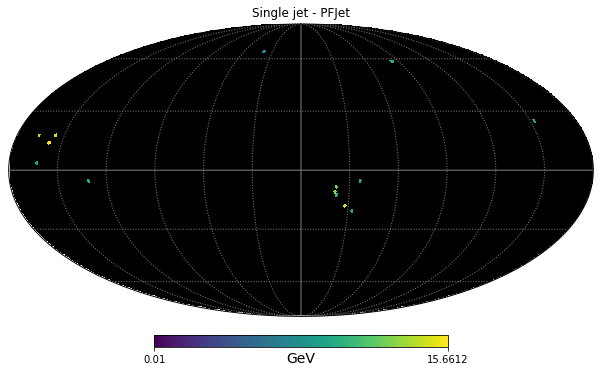

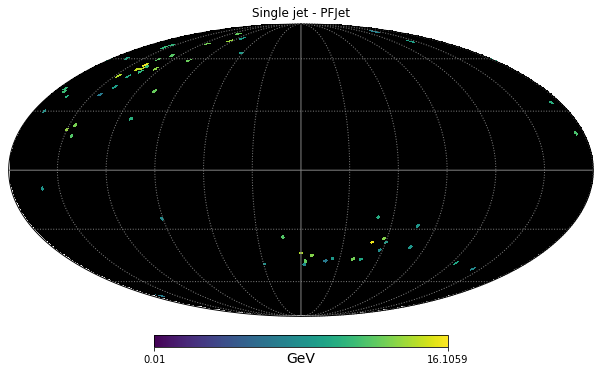

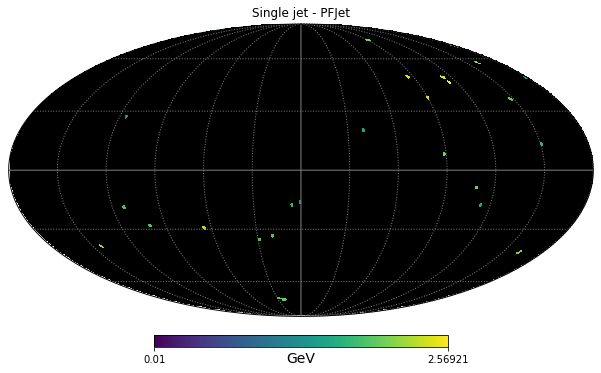

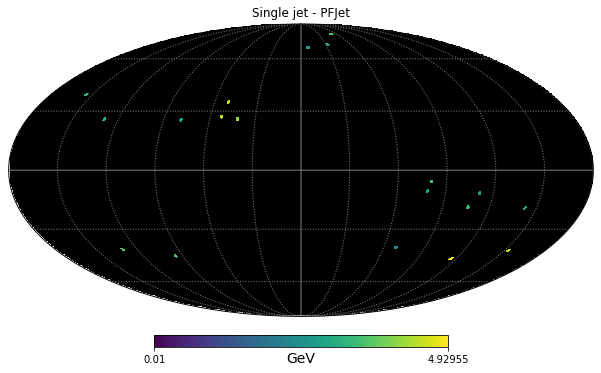

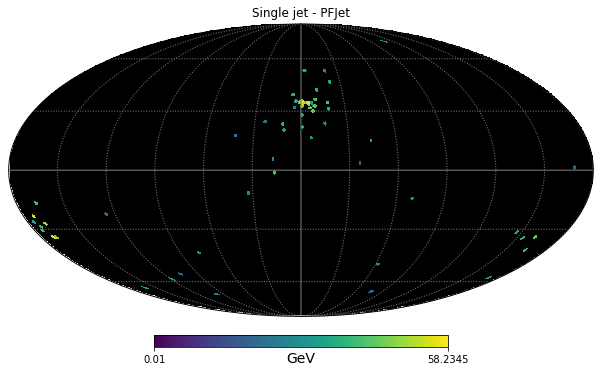

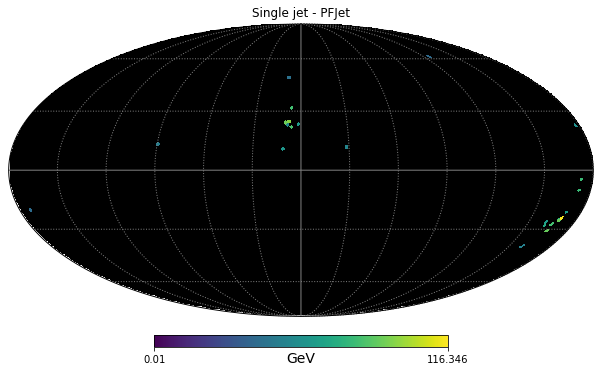

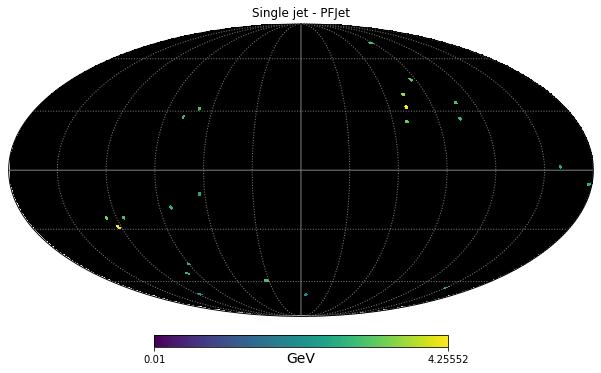

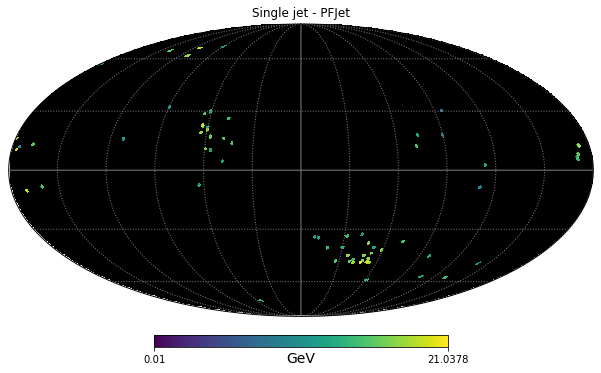

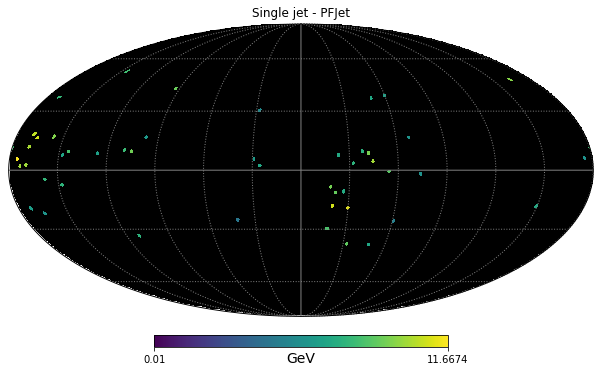

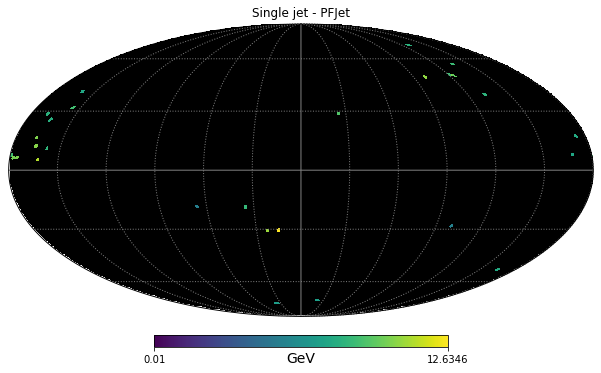

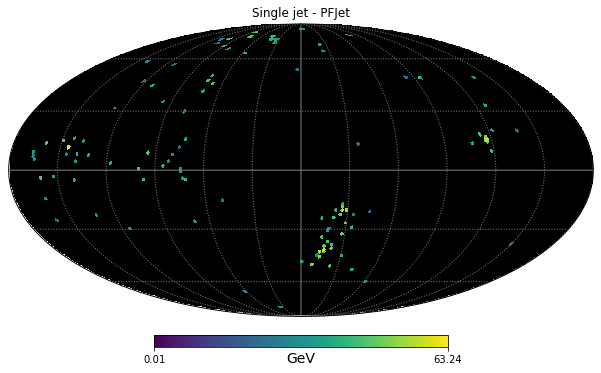

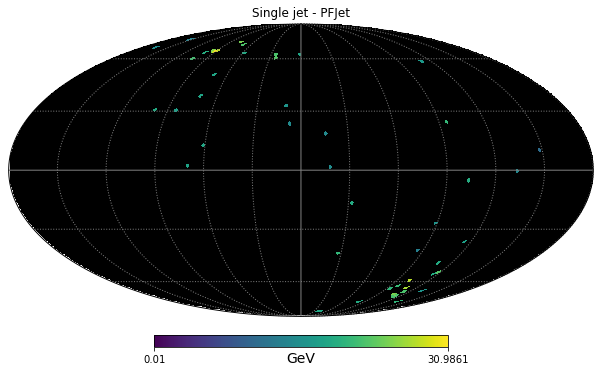

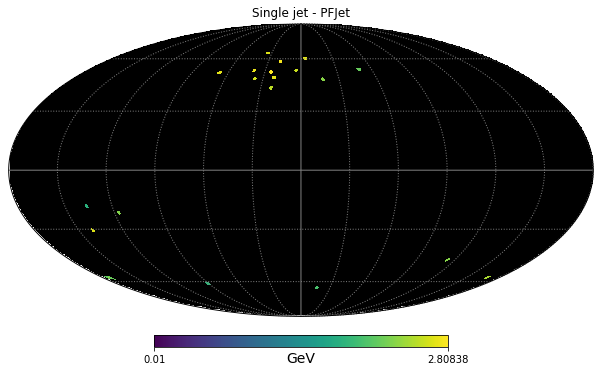

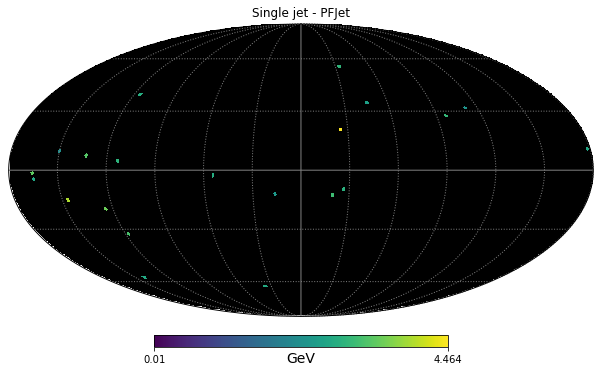

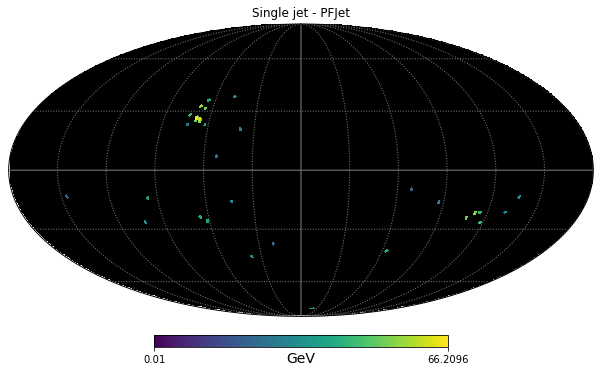

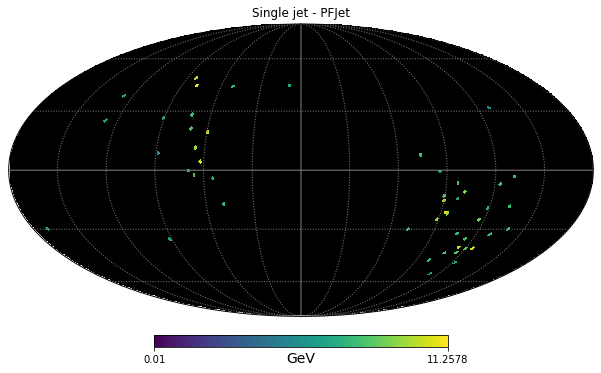

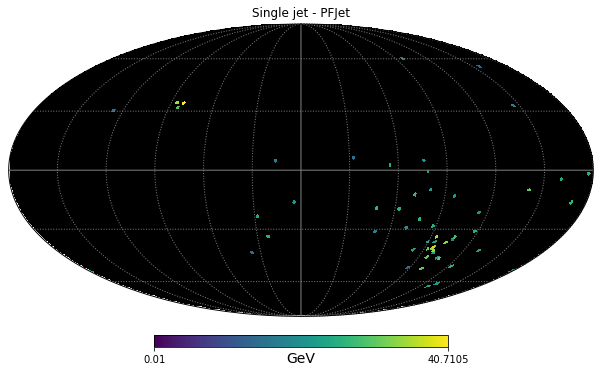

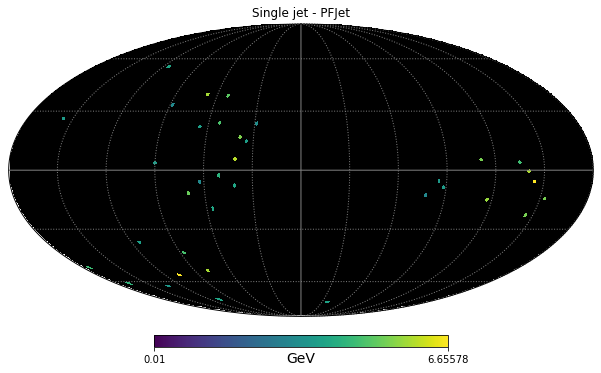

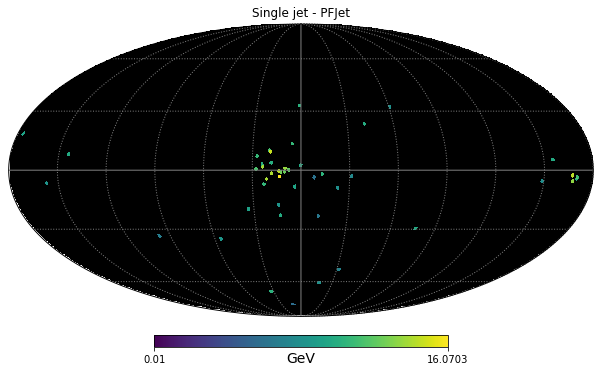

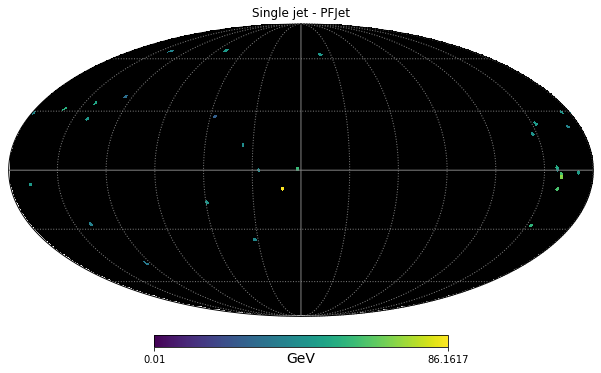

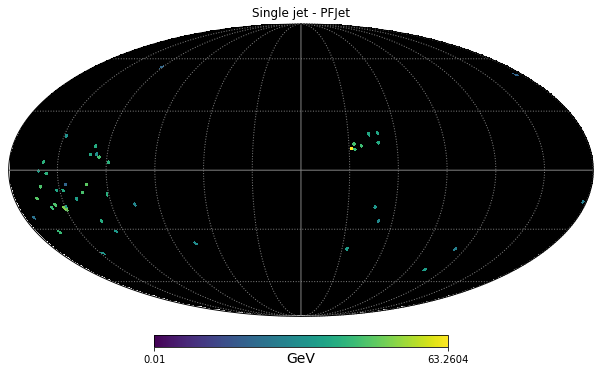

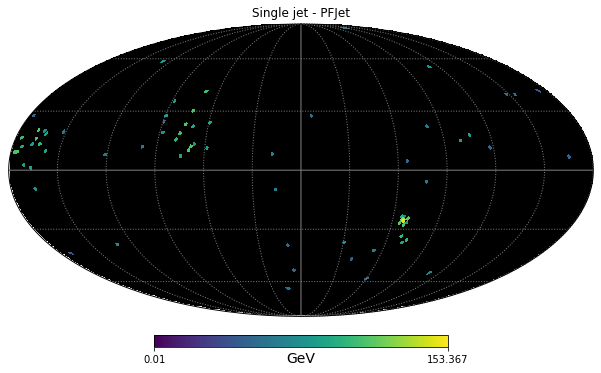

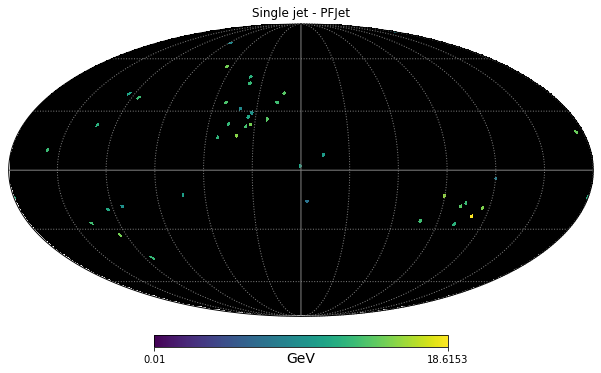

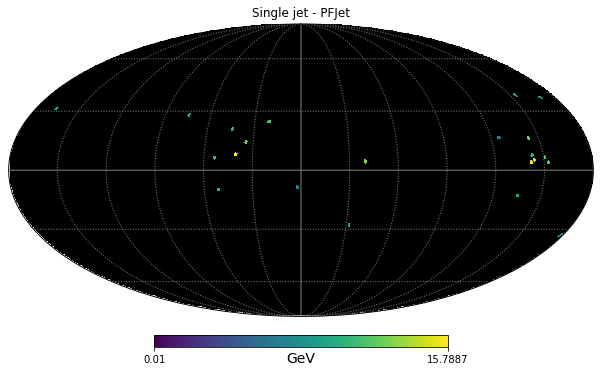

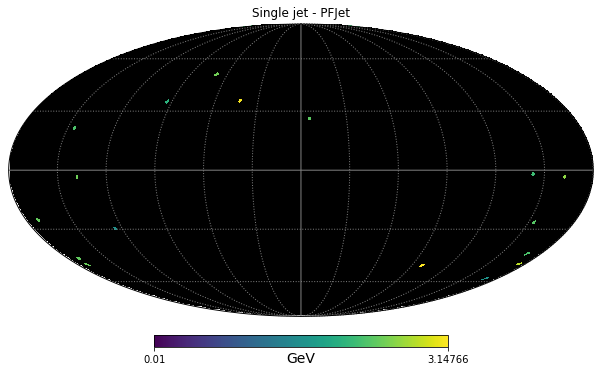

In [17]:
#Sky map of charged particles in PFjet
singlepixel = False

nside = 128*4

iev = 0
NPIX = hp.nside2npix(nside)
cls_list = []
print("number of events = ",len(event_test))
for jet_test in event_test:
    print("number of jets = ",len(jet_test))
    iev+=1
    ijet = 0
    for jet_particle_test in jet_test:
        print("number of particles = ",len(jet_particle_test))
        ijet+=1
        m = np.zeros(NPIX) # blank map
        for part in jet_particle_test:
            if(singlepixel):
                ipix_disc = hp.pixelfunc.ang2pix(nside=nside, theta=part.theta(), phi=part.phi())
            else: # choose radius
                vec = hp.ang2vec(part.theta(), part.phi())
                ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(1)) # all pixels within 1 degree of vector
            m[ipix_disc] += part.energy() # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
        if iev in range(1,10):
            hp.visufunc.mollview(m, title=r'Single jet - PFJet', unit=r'GeV', min=0.01, norm='log', badcolor='black')
            hp.graticule(color='grey') # draw grid lines

In [18]:
singlepixel = True #False
lmax = 360*4 #150
ls = np.array(range(1,lmax+1))

#Sky map of particles in jet that have matches to tracks
nside = 128*4
iev = 0
NPIX = hp.nside2npix(nside)
cls_list = []
print("number of events = ",len(event_test))
for jet_test in event_test:
    print("number of jets = ",len(jet_test))
    iev+=1
    ijet = 0
    for jet_particle_test in jet_test:
        print("number of particles = ",len(jet_particle_test))
        ijet+=1
        m = np.zeros(NPIX) # blank map
        for part in jet_particle_test:
            if(singlepixel):
                ipix_disc = hp.pixelfunc.ang2pix(nside=nside, theta=part.theta(), phi=part.phi())
                energy = part.energy()
            else: # choose radius
                vec = hp.ang2vec(part.theta(), part.phi())
                ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(0.1)) # all pixels within 0.1 degree of vector
                energy = part.energy()/len(ipix_disc)
            m[ipix_disc] += energy # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
print("number of cls = ",len(cls_list))

number of events =  100
number of jets =  4
number of particles =  14
number of particles =  58
number of particles =  27
number of particles =  19
number of jets =  3
number of particles =  61
number of particles =  24
number of particles =  22
number of jets =  2
number of particles =  67
number of particles =  48
number of jets =  5
number of particles =  28
number of particles =  114
number of particles =  49
number of particles =  21
number of particles =  21
number of jets =  2
number of particles =  34
number of particles =  48
number of jets =  2
number of particles =  53
number of particles =  36
number of jets =  2
number of particles =  46
number of particles =  29
number of jets =  2
number of particles =  45
number of particles =  74
number of jets =  3
number of particles =  40
number of particles =  22
number of particles =  18
number of jets =  2
number of particles =  20
number of particles =  75
number of jets =  2
number of particles =  34
number of particles =  35
n

[   1  181  361  541  721  901 1081 1261]


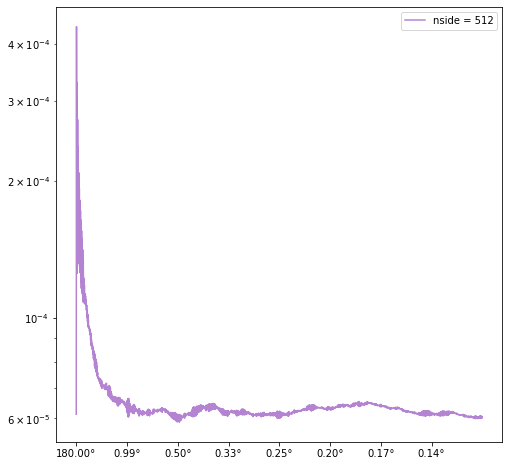

In [148]:
lmax=1440
ls = range(1,lmax+1)
default_x_ticks = np.array(range(1,lmax+1,180))
deg = []
for l in default_x_ticks:
    deg.append("{:.2f}".format(180/l)+'°')
    
print(default_x_ticks)

plt.figure(figsize=(8,8))
icls = 0
for cls_test in cls_list:
    icls+=1
    if (icls == 1):
        cls_hp = cls_test
    else:
        cls_hp += cls_test 

plt.semilogy(ls,cls_hp[ls],label='nside = {}'.format(nside), color='#B483D1')
plt.xticks(default_x_ticks, deg)
plt.legend()

0.0 180.0 -180.0 180.0


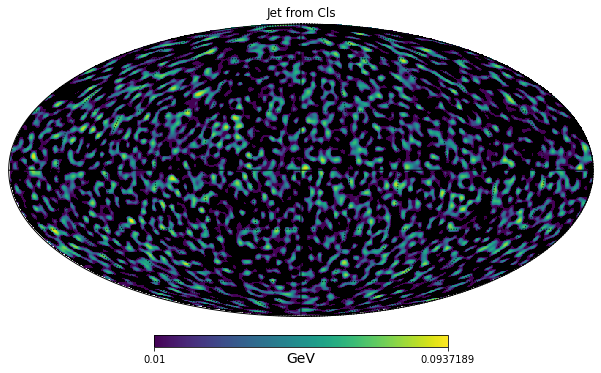

In [20]:
nside=128*4
lmax=360*4
mapredo = hp.sphtfunc.synfast(cls_hp, nside, lmax=80)
hp.visufunc.mollview(mapredo, title=r'Jet from Cls', unit=r'GeV', min=0.01, norm='log', badcolor='black')
hp.graticule()